# Exploratory Data Analysis

## Import Essential Libraries

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Import Data

In [3]:
df = pd.read_csv('datasets/twitch-data-cleaned.csv')
df.head()

,channel,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,partnered,mature,language,watch_time_hours,stream_time_hours,followers_per_hour,views_per_follower,engagement_rate
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,1.032694e+08,3587.50,483.570732,53.629351,0.008538
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,1.015280e+08,3530.75,388.071656,65.470013,0.004823
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,9.407652e+07,8588.00,119.210410,100.228279,0.006209
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,6.617197e+07,8629.00,81.583729,151.348098,0.001955
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,6.118333e+07,2061.00,1003.602135,38.192647,0.003312


In [4]:
# Summary Statistics
numerical_df = df[['watch_time_minutes', 'stream_time_minutes', 'peak_viewers', 'average_viewers', 'followers', 'followers_gained', 'views_gained', 'watch_time_hours', 'stream_time_hours', 'followers_per_hour', 'views_per_follower', 'engagement_rate']]
df.describe()

,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,watch_time_hours,stream_time_hours,followers_per_hour,views_per_follower,engagement_rate
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07,6.973799e+06,2008.586000,214.362221,197.545130,0.012748
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07,9.160592e+06,1422.936689,599.403079,1165.579838,0.026158
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05,2.036548e+06,57.750000,-5.021730,-784.087512,0.000397
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06,2.719832e+06,1229.312500,20.544001,31.185667,0.004898
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06,3.916513e+06,1804.000000,57.243064,69.964831,0.008291
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07,7.228999e+06,2364.062500,166.640747,155.014345,0.013810
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08,1.032694e+08,8690.750000,11772.973312,33552.612613,0.637848


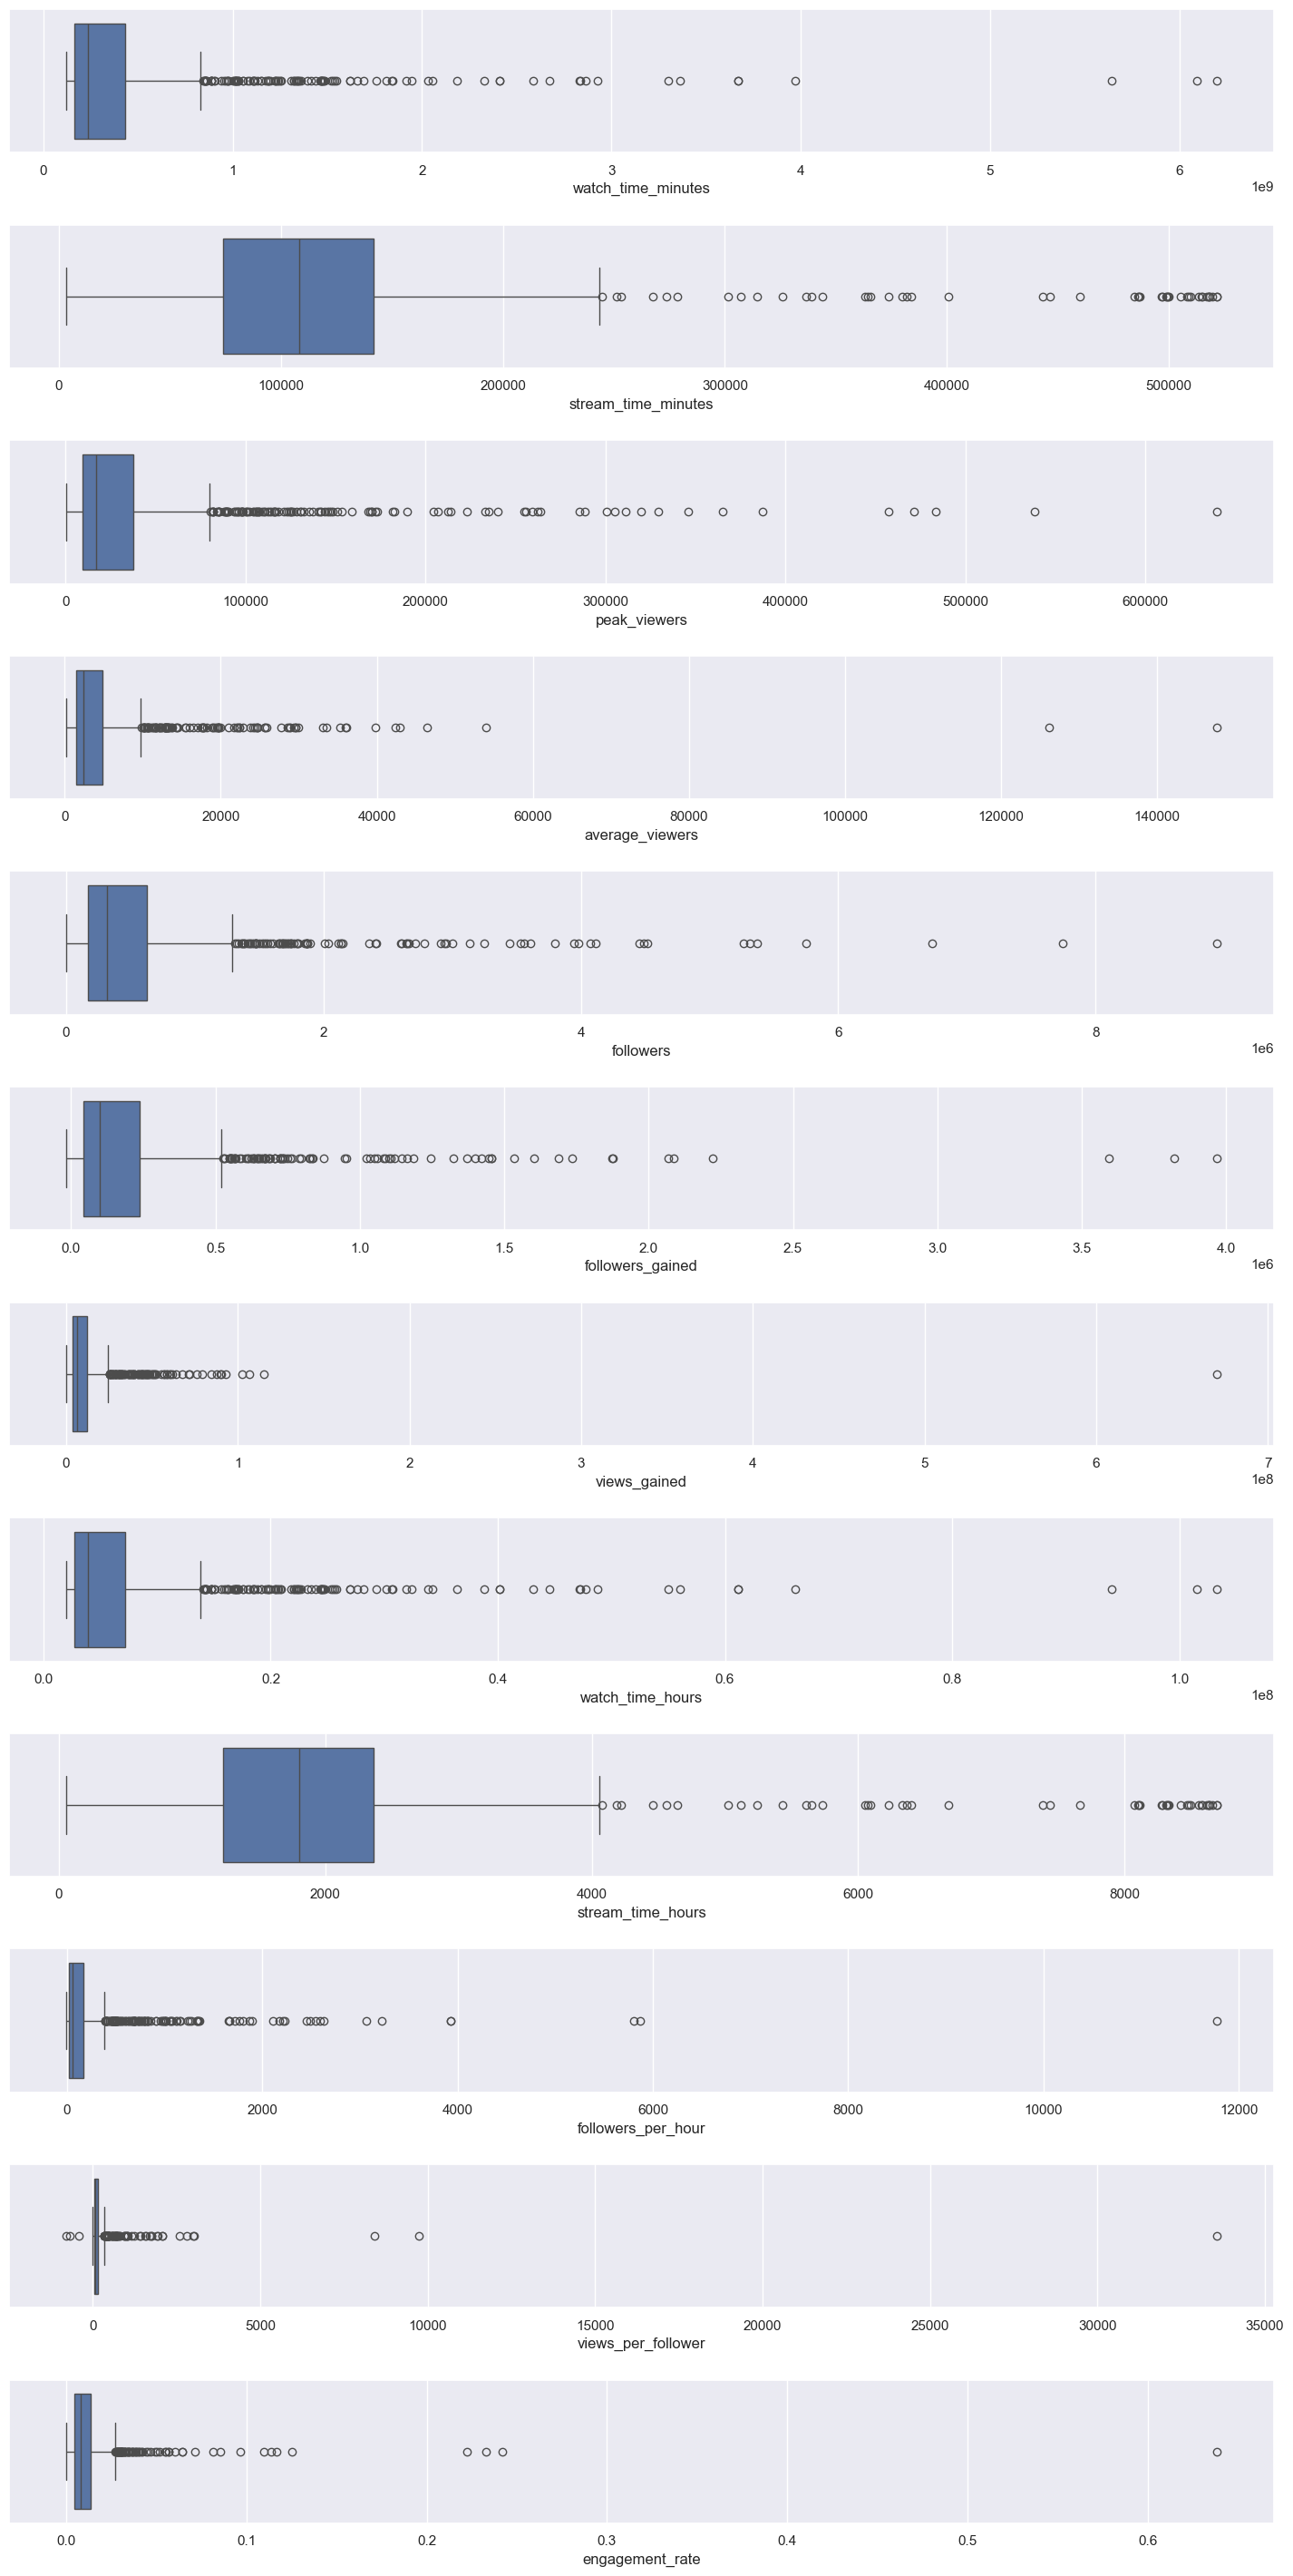

In [5]:
# Draw the distributions of all variables
f, axes = plt.subplots(len(numerical_df.columns), 1, figsize=(18, 36))
# add a space between the subplots
f.subplots_adjust(hspace=0.5)
count = 0

for var in numerical_df:
  # check if var is numeric
  if df[var].dtype != 'object' and df[var].dtype != 'bool':
    sb.boxplot(data=df[var], orient='h', ax=axes[count])
    count += 1

In [6]:
df['follower_growth_rate'] = df['followers_gained'] / df['stream_time_minutes'].replace(0, np.nan)
df['view_growth_rate'] = df['views_gained'] / df['stream_time_minutes'].replace(0, np.nan)
df['watch_per_stream_min'] = df['watch_time_minutes'] / df['stream_time_minutes'].replace(0, np.nan)
df['language'] = df['language'].astype('category').cat.codes

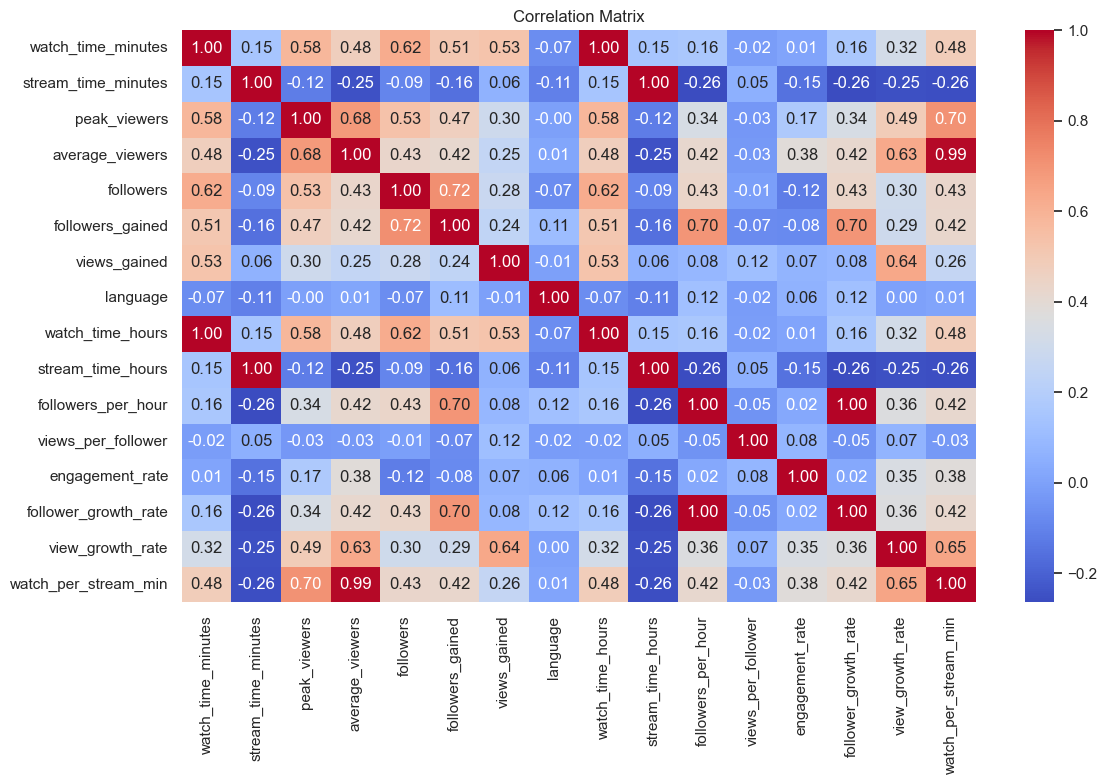

In [8]:
plt.figure(figsize=(12, 8))
sb.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()